# Created by Purnawirman October 8th 2015
## Twitter data for "Sports" related classification

In [1]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib2
import bs4 #this is beautiful soup

import json

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [3]:
## Cant share my keys in github
## make a text file, four lines, each consist of the api key from twitter

twitter_key =[]
with open('twitter_key.txt') as fp:
    consumer_key =  fp.readline()
    consumer_secret = fp.readline()
    access_token = fp.readline()
    access_secret = fp.readline()

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret) 
api = tweepy.API(auth)

In [4]:
ls -l

total 1501616
-rw-r--r--  1 purnawirman  staff        150 Oct  9 17:24 README.md
-rw-r--r--  1 purnawirman  staff     797310 Oct 28 22:30 Twitter data mining.ipynb
-rw-r--r--  1 purnawirman  staff      35029 Oct 26 15:38 Untitled.ipynb
-rw-r--r--  1 purnawirman  staff     463389 Oct 10 13:33 data_scraping_transcript-Copy1.ipynb
-rw-r-----@ 1 purnawirman  staff      77589 Oct 24 22:58 kaggle_otto_nn.py
-rw-r--r--  1 purnawirman  staff        865 Oct 10 13:33 non_sports_stream.py
-rw-r--r--  1 purnawirman  staff   74913060 Oct 10 13:34 non_sports_stream.txt
-rw-r--r--  1 purnawirman  staff  199762680 Oct  8 11:34 non_sports_stream2.txt
-rw-r--r--  1 purnawirman  staff     336653 Oct  8 11:37 output.txt
-rw-r--r--  1 purnawirman  staff        187 Oct 10 13:33 requirements.txt
-rw-r--r--  1 purnawirman  staff        925 Oct 10 13:33 sports_stream.py
-rw-r--r--  1 purnawirman  staff   40122706 Oct 10 13:34 sports_stream.txt
-rw-r--r--  1 purnawirman  staff  112437229 Oct  8 11:34 sports_str


### Stream real time twitter data with tags (see the sports_stream.py and non_sports_stream.py for the tags)

In [5]:
## The following streaming SHOULD be run on the terminal, and it requires ctrl C to interrupt the streaming.
## If not stopped/interrupted, it will run indefinitely.

# !python sports_stream.py > output_1.txt
# !python non_sports_stream.py > output_0.txt

!ls

README.md                            sports_stream2.txt
Twitter data mining.ipynb            test.csv
Untitled.ipynb                       test.csv.zip
data_scraping_transcript-Copy1.ipynb test.txt
kaggle_otto_nn.py                    text.model.bin
non_sports_stream.py                 text8
non_sports_stream.txt                text8.model
non_sports_stream2.txt               text8.model.syn0.npy
output.txt                           text8.model.syn1.npy
requirements.txt                     train.csv
sports_stream.py                     train.csv.zip
sports_stream.txt                    twitter_key.txt


In [6]:
tweets_data_path = 'sports_stream.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        if 'text' in tweet.keys():
            tweets_data.append(tweet)
    except:
        continue
tweets_file.close()

In [7]:
print "Total number of rows: {} tweets.".format(len(tweets_data))
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['text'] = tweets['text'].str.lower()
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['label'] = 1
# tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
tweets = tweets[tweets['lang'] == 'en']
print "Total number of rows: {} english tweets.".format(len(tweets))
tweets.index = range(len(tweets))
tweets.tail()

Total number of rows: 8970 tweets.
Total number of rows: 6186 english tweets.


,text,lang,label
6181,five things to know about the 2015-16 season ....,en,1
6182,"@glosfa sunday minor (north) cup, qf 01/11/15:...",en,1
6183,but harden is a guard?¿ https://t.co/0krjkntf01,en,1
6184,fifa names issa hayatou as its acting presiden...,en,1
6185,rt @jamilsmith: domestic abuser greg hardy ret...,en,1


In [8]:
tweets_data_path = 'non_sports_stream.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        if 'text' in tweet.keys():
            tweets_data.append(tweet)
    except:
        continue
tweets_file.close()

In [9]:
print "Total number of rows: {} tweets.".format(len(tweets_data))
tweets2 = pd.DataFrame()
tweets2['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets2['text'] = tweets2['text'].str.lower()
tweets2['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets2['label'] = 0
# tweets2['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
tweets2 = tweets2[tweets2['lang'] == 'en']
tweets2.index = range(len(tweets),len(tweets)+len(tweets2))
tweets2.head()

Total number of rows: 15331 tweets.


,text,lang,label
6186,rt @whimsicallydemi: .@thegrammys how much lon...,en,0
6187,rt @musicfridaylive: opening #nn15 &amp; #nmp1...,en,0
6188,rt @marie_oleski: @billiamkory i need music su...,en,0
6189,see 'rocky horror picture show' cast reunite f...,en,0
6190,rt @sofiaorden: the rocker - peter cattaneo | ...,en,0


In [10]:
# tweets_by_lang = tweets['lang'].value_counts()

# fig, ax = plt.subplots()
# ax.tick_params(axis='x', labelsize=15)
# ax.tick_params(axis='y', labelsize=10)
# ax.set_xlabel('Languages', fontsize=15)
# ax.set_ylabel('Number of tweets' , fontsize=15)
# ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
# tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [11]:
# tweets_by_country = tweets['country'].value_counts()

# fig, ax = plt.subplots()
# ax.tick_params(axis='x', labelsize=15)
# ax.tick_params(axis='y', labelsize=10)
# ax.set_xlabel('Countries', fontsize=15)
# ax.set_ylabel('Number of tweets' , fontsize=15)
# ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
# tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [12]:
tweets_df = pd.concat([tweets,tweets2])
print "Total number of combined rows: {} tweets.".format(len(tweets_df))

Total number of combined rows: 18484 tweets.


In [13]:
tweets_df.reindex(np.random.permutation(tweets_df.index))

,text,lang,label
6929,rt @2018abcd: #russia kiling innocent people i...,en,0
8503,http://t.co/qukkfifgro #music jackson pro dink...,en,0
12877,rt @musicfridaylive: opening #nn15 &amp; #nmp1...,en,0
5268,#football #soccer goal social snap: messi &amp...,en,1
1204,# fifa under 17 world tournament http://t.co/t...,en,1
3269,rt sports_ndtv: india lose 1-2 to turkmenistan...,en,1
2134,"@35196085d6d341b simpson emmanuel, do you need...",en,1
10036,rt @bornonthebayou9: ted cruz: gov. actuaries...,en,0
12469,bad birthday to criminal #putin from #syrian r...,en,0
10907,"rt @saiyansyrian: every time an assadist, hezb...",en,0


#### Install nltk library, and remember to download nltk - models- punkt, look at the following site to check if encounter lookuperror:
http://stackoverflow.com/questions/4867197/failed-loading-english-pickle-with-nltk-data-load
### Twitter data mining tutorial: 
http://marcobonzanini.com/2015/06/16/mining-twitter-data-with-python-and-js-part-7-geolocation-and-interactive-maps/

In [14]:
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords

sample_tweet = 'RT @marcobonzanini: just an example! :D http://example.com #NLP'
print(word_tokenize(sample_tweet))
# remove stopwords
import string
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']


track_sport=['sports','soccer','basketball','NBA','nba','FIFA','fifa','ESPN'\
                     ,'espn','Wrestling','Tennis','NFL','nfl']
track_sport = map(lambda word: word.lower(),track_sport)
track_nonsport=['Hollywood','Movies','Music','Health','Politic','Election','Syria']
track_nonsport = map(lambda word: word.lower(),track_nonsport)


['RT', '@', 'marcobonzanini', ':', 'just', 'an', 'example', '!', ':', 'D', 'http', ':', '//example.com', '#', 'NLP']


In [15]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)


def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

def tokstop(s):
    result = [term for term in preprocess(s) if term not in stop]
    return result

def hashtag(s):
    result = [term for term in preprocess(s) if term.startswith('#')]
    return result

def mention(s):
    result = [term for term in preprocess(s) if term.startswith('@')]
    return result

def content(s):
    result = [term for term in preprocess(s) if term not in stop and not term.startswith(('@','#'))]
    result.extend([word[1:] for word in mention(s)])
    result.extend([word[1:] for word in hashtag(s)])
    return result

def contentsport(s):
    result = [term for term in preprocess(s) if term not in stop+track_sport and not term.startswith(('@','#'))]
    result.extend([word[1:] for word in mention(s) if word not in track_sport])
    result.extend([word[1:] for word in hashtag(s) if word not in track_sport])
    return result

def contentnonsport(s):
    result = [term for term in preprocess(s) if term not in stop+track_nonsport and not term.startswith(('@','#'))]
    result.extend([word[1:] for word in mention(s) if word not in track_nonsport])
    result.extend([word[1:] for word in hashtag(s) if word not in track_nonsport])
    return result




In [16]:
print "original tweet :%s " %sample_tweet+' nfl'
print "tokenize tweet :%s " %tokenize(sample_tweet+' nfl')
print "processs tweet :%s " %preprocess(sample_tweet+' nfl')
print "tok+stop tweet :%s " %tokstop(sample_tweet+' nfl')
print "hashtag  tweet :%s " %hashtag(sample_tweet+' nfl')
print "mention  tweet :%s " %mention(sample_tweet+' nfl')
print "content  tweet :%s " %content(sample_tweet+' nfl'.lower())
print "content sport  tweet :%s " %contentsport(sample_tweet+' nfl'.lower())


original tweet :RT @marcobonzanini: just an example! :D http://example.com #NLP  nfl
tokenize tweet :['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP', 'nfl'] 
processs tweet :['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP', 'nfl'] 
tok+stop tweet :['RT', '@marcobonzanini', 'example', ':D', 'http://example.com', '#NLP', 'nfl'] 
hashtag  tweet :['#NLP'] 
mention  tweet :['@marcobonzanini'] 
content  tweet :['RT', 'example', ':D', 'http://example.com', 'nfl', 'marcobonzanini', 'NLP'] 
content sport  tweet :['RT', 'example', ':D', 'http://example.com', 'marcobonzanini', 'NLP'] 


In [50]:
print tweets_df['text'][7:8]

7    @388dalesfan @espn people make too much of it ...
Name: text, dtype: object


In [17]:
# updating the dataframe in our data
tweets_df['tokstop']=tweets_df['text'].map(tokstop)
tweets_df['hashtag']=tweets_df['text'].map(hashtag)
tweets_df['mention']=tweets_df['text'].map(mention)
x = list(tweets_df[tweets_df['label']==1]['text'].map(contentsport).values)
y = list(tweets_df[tweets_df['label']==0]['text'].map(contentnonsport).values)
x.extend(y)
print len(x)
tweets_df['content'] = x
# tweets_df['content']=tweets_df['text'].map(content)
tweets_df.head()

18484


,text,lang,label,tokstop,hashtag,mention,content
0,rt @lfletcher59: great perspective on an idiot...,en,1,"[@lfletcher59, great, perspective, idiot, http...",[],[@lfletcher59],"[great, perspective, idiot, http://t.co/nyospc..."
1,"rt @anthonydimoro: i love october. halloween, ...",en,1,"[@anthonydimoro, love, october, halloween, nfl...",[#sportsrants],[@anthonydimoro],"[love, october, halloween, nhl, playoff, baseb..."
2,rt @auburnswimming: swimming and diving opens ...,en,1,"[@auburnswimming, swimming, diving, opens, dua...",[],[@auburnswimming],"[swimming, diving, opens, dual, meet, season, ..."
3,my latest episode is now available! listen to ...,en,1,"[latest, episode, available, listen, new, epis...",[#blogtalkradio],[],"[latest, episode, available, listen, new, epis..."
4,#fifa football 2005 was first released on this...,en,1,"[#fifa, football, 2005, first, released, day, ...",[#fifa],[],"[football, 2005, first, released, day, 2004, h..."


## Latent Dirichlet Allocation implementation

The following are reference for the LDA implementation.
Paper: https://www.cs.princeton.edu/~blei/papers/BleiNgJordan2003.pdf

LDA python package tutorial: http://chrisstrelioff.ws/sandbox/2014/11/13/getting_started_with_latent_dirichlet_allocation_in_python.html

Youtube quickstart guide:
https://www.youtube.com/watch?v=Zfhc6GQ84e4

In [18]:
# import lda
# # document-term matrix
# X = lda.datasets.load_reuters()
# print("type(X): {}".format(type(X)))
# print("shape: {}\n".format(X.shape))

# # the vocab
# vocab = lda.datasets.load_reuters_vocab()
# print vocab[0:10]
# print("type(vocab): {}".format(type(vocab)))
# print("len(vocab): {}\n".format(len(vocab)))
# # 
# # titles for each story
# titles = lda.datasets.load_reuters_titles()
# print titles[0]
# print("type(titles): {}".format(type(titles)))
# print("len(titles): {}\n".format(len(titles)))



In [19]:
# model = lda.LDA(n_topics=20, n_iter=500, random_state=1)
# model.fit(X)

In [20]:
# # topic_word is the normalized probability distribution of the training words in each topic
# topic_word = model.topic_word_
# print("type(topic_word): {}".format(type(topic_word)))
# print("shape: {}".format(topic_word.shape))

# # topic_word is the normalized probability distribution of the training documents in each topic
# doc_topic = model.doc_topic_
# print("type(doc_topic): {}".format(type(doc_topic)))
# print("shape: {}".format(doc_topic.shape))

In [21]:
# # choose the highest value of the probability for as the topic of the document
# for n in range(10):
#     topic_most_pr = doc_topic[n].argmax()
#     print("doc: {} topic: {}\n{}...".format(n,
#                                             topic_most_pr,
#                                             titles[n][:50]))

### Word2vec from gensim

In [22]:
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = word2vec.Text8Corpus('text8')
model = word2vec.Word2Vec(sentences, size=200)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [23]:
model.save('text8.model')

In [36]:
track_sport

['sports',
 'soccer',
 'basketball',
 'nba',
 'nba',
 'fifa',
 'fifa',
 'espn',
 'espn',
 'wrestling',
 'tennis',
 'nfl',
 'nfl']

### Training a classifier

In [24]:
from matplotlib import cm

from scipy.signal import medfilt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import cross_validation
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV

from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, AutoEncoder
from keras.layers.recurrent import LSTM
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.optimizers import SGD
from keras.layers import containers
from keras import callbacks
from keras.regularizers import l2, activity_l2

In [25]:
def find_similarity(word):
    try:
        return model.similarity(word,'sport')
    except:
        return None

def find_max_similar_from_list(list_of_words):
    if not list_of_words:
        return None
    max_value = max(map(find_similarity,list_of_words))
#     max_word = list_of_words[np.argmax(map(find_similarity,list_of_words))]
#     print max_word
    return max_value

def find_max_word_from_list(list_of_words):
    if not list_of_words:
        return None
#     max_value = max(map(find_similarity,list_of_words))
    max_word = list_of_words[np.argmax(map(find_similarity,list_of_words))]
#     print max_word
    return max_word

In [26]:
feature_df = pd.DataFrame()
feature_df['content'] = tweets_df['content']

tweets_df['max_similarity'] = feature_df.applymap(find_max_similar_from_list)
tweets_df['max_word'] = feature_df.applymap(find_max_word_from_list)


In [42]:
track_nonsport

['hollywood', 'movies', 'music', 'health', 'politic', 'election', 'syria']

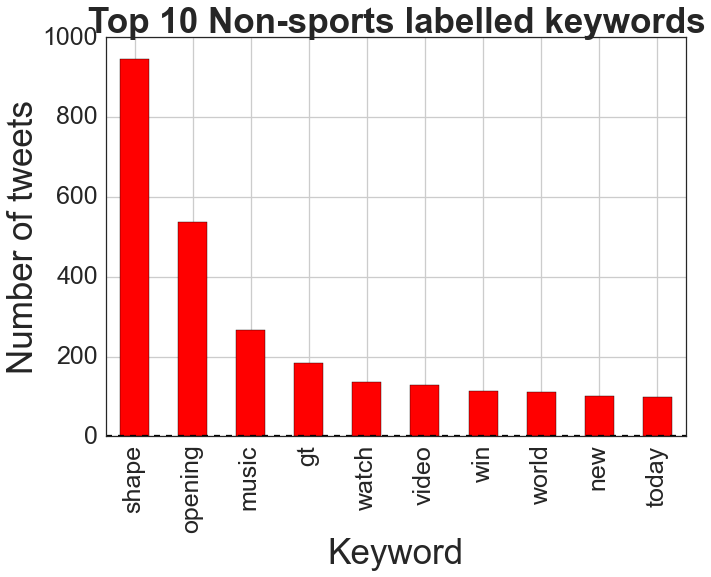

In [57]:
tweets_by_lang = tweets_df[6186:]['max_word'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xlabel('Keyword', fontsize=35)
ax.set_ylabel('Number of tweets' , fontsize=35)
ax.set_title('Top 10 Non-sports labelled keywords', fontsize=35, fontweight='bold')
tweets_by_lang[:10].plot(ax=ax, kind='bar', color='red')

In [28]:
X_list = []
y_list = []
for i,word in enumerate(tweets_df['max_word']):
    try:
        X_list.append(model[word])
        y_list.append(tweets_df['label'][i])
    except:
        print tweets_df['text'][i],word
        
# print X_list

@timtebow coulda did that https://t.co/fzuysdclnv coulda
whoa https://t.co/z4v6tbq9ga whoa
@smokeydid espn bruh smh bruh
wrestling on #madisonsquaregarden http://t.co/jgjrjtdagf http://t.co/jgjrjtdagf
wrestling on #madisonsquaregarden http://t.co/27n2t2lewm http://t.co/27n2t2lewm
sports sports sports sports sports sports sports sports sports None
rt @wwecesaro: #i❤️wrestling ❤
this...all of it.  https://t.co/2a2xqnsyk9 https://t.co/2a2xqnsyk9
@twtwanitaa basketball. 🏀 #teamkms ☺️ �
i'm on it! https://t.co/hjpw2smazx i'm
not to-fucking-day! https://t.co/vtm2i6kv0j to-fucking-day
🎤ｒｅｔｗｅｅｔ

🎤ｉｆ

🎤ｙｏｕ

🎤ｆｏｌｌｏｗｂａｃｋ
#realu #promoteam #ubernation
@realupromo @joelovessnacks @visitaustintx  https://t.co/aojyrmsxzf �
rt @daiiygopro: zorb soccer 😱🙌🏽 http://t.co/3sjqn5jac0 zorb
rt @daiiygopro: zorb soccer 😱🙌🏽 http://t.co/3sjqn5jac0 zorb
rt @wwecesaro: #i❤️wrestling ❤
rt @battingstanceg: sports... https://t.co/2i6wsvs47s https://t.co/2i6wsvs47s
😂😂😂😂 what about the fifa 1990's? 🐸☕️ https://t.co/l3e

In [29]:
X = np.vstack([X_list])
y = np_utils.to_categorical(y_list, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=123)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, random_state=123)

print('train: X.shape = {}  y.shape = {} d:p split = {}'.format(X_train.shape, y_train.shape, np.sum(y_train[:,1]) / float(len(y_train))))
print('cv: X.shape = {}  y.shape = {} d:p split = {}'.format(X_cv.shape, y_cv.shape, np.sum(y_cv[:,1]) / float(len(y_cv))))
print('test: X.shape = {}  y.shape = {} d:p split = {}'.format(X_test.shape, y_test.shape, np.sum(y_test[:,1]) / float(len(y_test))))

train: X.shape = (13257, 200)  y.shape = (13257, 2) d:p split = 0.331824696387
cv: X.shape = (3315, 200)  y.shape = (3315, 2) d:p split = 0.341779788839
test: X.shape = (1842, 200)  y.shape = (1842, 2) d:p split = 0.337676438654


In [30]:
dims = X.shape[1]
nb_classes = y.shape[1]


print("Building model...")

model = Sequential()
model.add(Dense(512, input_shape=(dims,)))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

# model.add(Dense(512))
# model.add(PReLU())
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(512))
# model.add(PReLU())
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam")



print('Done..')

Building model...
Done..


In [31]:
batch_size = 100
nb_epoch = 25

print("Train...")
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, validation_data=(X_cv, y_cv), show_accuracy=True)

Train...
Train on 13257 samples, validate on 3315 samples
Epoch 1/25
13257/13257 [==============================] - 2078s - loss: 0.4751 - acc: 0.7787 - val_loss: 0.4087 - val_acc: 0.8302
Epoch 2/25
13257/13257 [==============================] - 1949s - loss: 0.3991 - acc: 0.8316 - val_loss: 0.3851 - val_acc: 0.8452
Epoch 3/25
13257/13257 [==============================] - 1916s - loss: 0.3749 - acc: 0.8426 - val_loss: 0.3715 - val_acc: 0.8495
Epoch 4/25
13257/13257 [==============================] - 1908s - loss: 0.3547 - acc: 0.8512 - val_loss: 0.3610 - val_acc: 0.8582
Epoch 5/25
13257/13257 [==============================] - 1909s - loss: 0.3397 - acc: 0.8601 - val_loss: 0.3577 - val_acc: 0.8633
Epoch 6/25
13257/13257 [==============================] - 1908s - loss: 0.3272 - acc: 0.8634 - val_loss: 0.3558 - val_acc: 0.8658
Epoch 7/25
13257/13257 [==============================] - 1912s - loss: 0.3183 - acc: 0.8687 - val_loss: 0.3544 - val_acc: 0.8600
Epoch 8/25
13257/13257 [========

1842/1842 [==============================] - 49s    
             precision    recall  f1-score   support

        0.0       0.86      0.92      0.89      1220
        1.0       0.82      0.70      0.76       622

avg / total       0.84      0.85      0.84      1842

roc auc = 0.902853038849


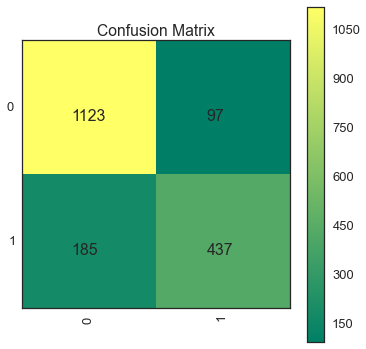

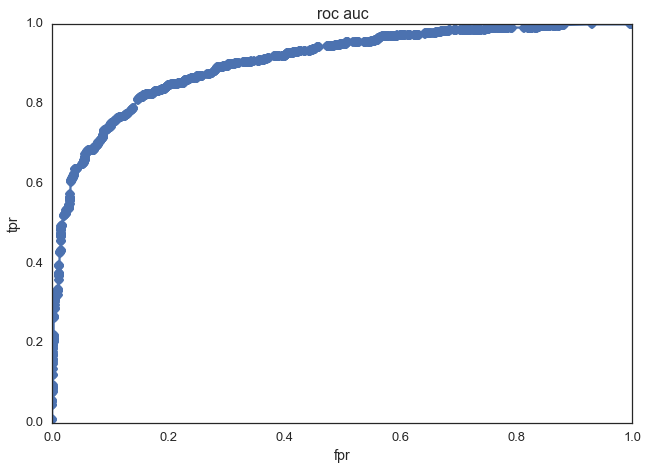

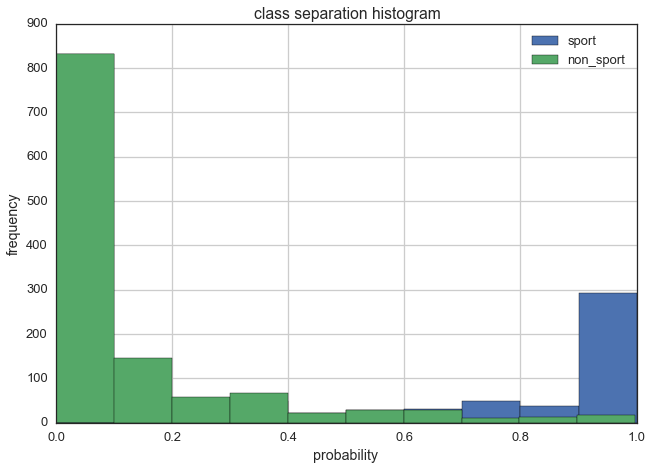

In [58]:
y_predicted_proba = model.predict_proba(X_test)
y_predicted = model.predict_classes(X_test)

print(classification_report(y_test[:,1], y_predicted))

conf_mat = confusion_matrix(y_test[:,1], y_predicted)

fig = plt.figure(figsize=(6,6))
width = np.shape(conf_mat)[1]
height = np.shape(conf_mat)[0]

res = plt.imshow(np.array(conf_mat), cmap=cm.summer, interpolation='nearest')
for i, row in enumerate(conf_mat):
    for j, c in enumerate(row):
        if c>0:
            plt.text(j-.12, i+.1, c, fontsize=16)
            
cb = fig.colorbar(res)
plt.title('Confusion Matrix')
_ = plt.xticks([0,1], rotation=90)
_ = plt.yticks([0,1])
plt.grid(False)

print('roc auc = {}'.format(roc_auc_score(y_test[:,1], y_predicted_proba[:,1])))

fpr,tpr,thresholds = roc_curve(y_test[:,1], y_predicted_proba[:,1])
plt.figure()
plt.plot(fpr,tpr, 'o-')
plt.title('roc auc')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

ax = pd.DataFrame({'sport':y_predicted_proba[:,1][y_test[:,1]==1]}).plot(kind='hist')
pd.DataFrame({'non_sport':y_predicted_proba[:,1][y_test[:,1]==0]}).plot(kind='hist', ax=ax)
plt.ylabel('frequency')
plt.xlabel('probability')
plt.title('class separation histogram')
plt.show()

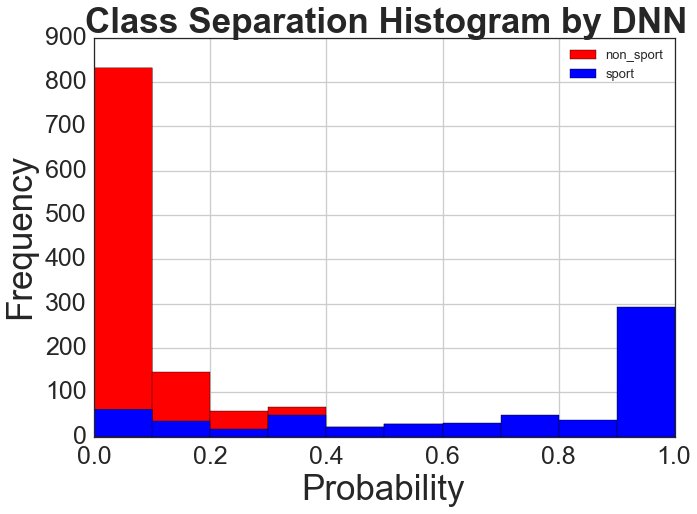

In [65]:
fig, ax = plt.subplots()
pd.DataFrame({'non_sport':y_predicted_proba[:,1][y_test[:,1]==0]}).plot(ax=ax, kind='hist', color='red')
pd.DataFrame({'sport':y_predicted_proba[:,1][y_test[:,1]==1]}).plot(ax=ax, kind='hist', color='blue')
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xlabel('Probability', fontsize=35)
ax.set_ylabel('Frequency' , fontsize=35)
ax.set_title('Class Separation Histogram by DNN', fontsize=35, fontweight='bold')

### SVM

In [37]:
from sklearn.svm import SVC
model_svc = SVC(C=1,kernel = 'rbf',probability=True)
model_svc.fit(X,np.array(y_list))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

             precision    recall  f1-score   support

        0.0       0.78      0.97      0.87      1220
        1.0       0.90      0.47      0.62       622

avg / total       0.82      0.80      0.78      1842

roc auc = 0.846327947921


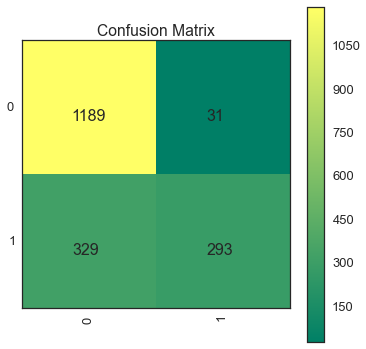

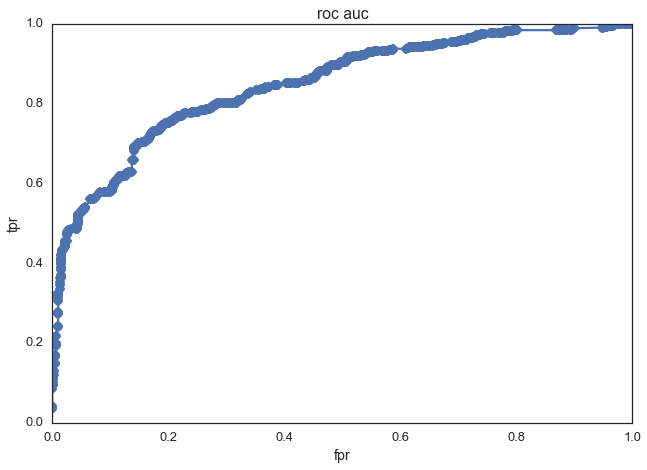

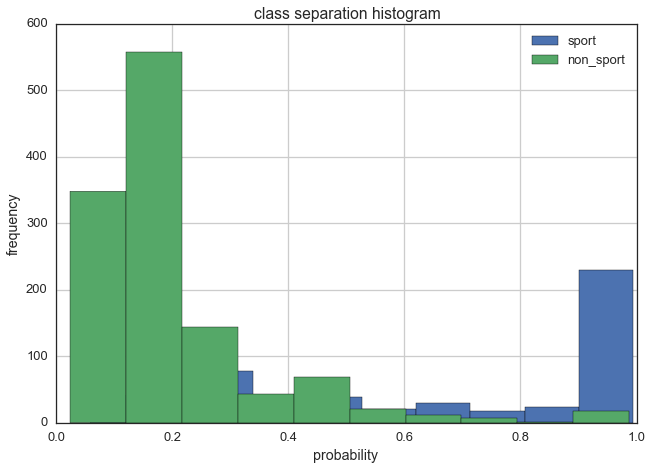

In [67]:
y_predicted_proba = model_svc.predict_proba(X_test)
y_predicted = model_svc.predict(X_test)

print(classification_report(y_test[:,1], y_predicted))

conf_mat = confusion_matrix(y_test[:,1], y_predicted)

fig = plt.figure(figsize=(6,6))
width = np.shape(conf_mat)[1]
height = np.shape(conf_mat)[0]

res = plt.imshow(np.array(conf_mat), cmap=cm.summer, interpolation='nearest')
for i, row in enumerate(conf_mat):
    for j, c in enumerate(row):
        if c>0:
            plt.text(j-.12, i+.1, c, fontsize=16)
            
cb = fig.colorbar(res)
plt.title('Confusion Matrix')
_ = plt.xticks([0,1], rotation=90)
_ = plt.yticks([0,1])
plt.grid(False)

print('roc auc = {}'.format(roc_auc_score(y_test[:,1], y_predicted_proba[:,1])))

fpr,tpr,thresholds = roc_curve(y_test[:,1], y_predicted_proba[:,1])
plt.figure()
plt.plot(fpr,tpr, 'o-')
plt.title('roc auc')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

ax = pd.DataFrame({'sport':y_predicted_proba[:,1][y_test[:,1]==1]}).plot(kind='hist')
pd.DataFrame({'non_sport':y_predicted_proba[:,1][y_test[:,1]==0]}).plot(kind='hist', ax=ax)
plt.ylabel('frequency')
plt.xlabel('probability')
plt.title('class separation histogram')
plt.show()

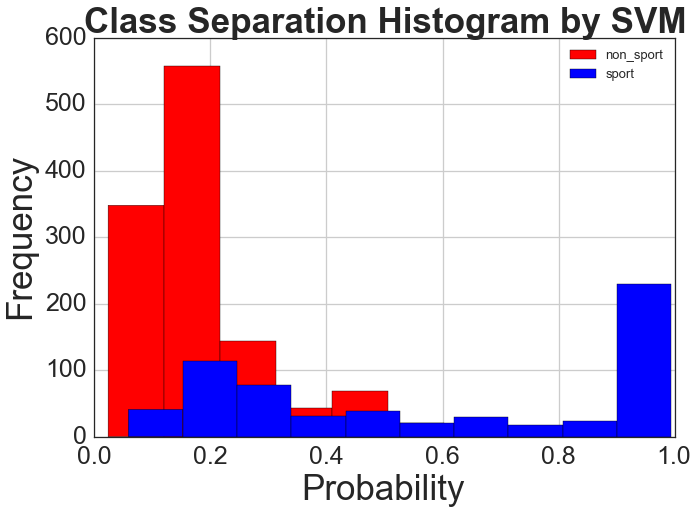

In [68]:
fig, ax = plt.subplots()
pd.DataFrame({'non_sport':y_predicted_proba[:,1][y_test[:,1]==0]}).plot(ax=ax, kind='hist', color='red')
pd.DataFrame({'sport':y_predicted_proba[:,1][y_test[:,1]==1]}).plot(ax=ax, kind='hist', color='blue')
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xlabel('Probability', fontsize=35)
ax.set_ylabel('Frequency' , fontsize=35)
ax.set_title('Class Separation Histogram by SVM', fontsize=35, fontweight='bold')

In [270]:
for word in test.loc[(test['label']==0).values * (test['max_similarity']>0.4).values]['content']:
    print word 

[u'jyp', u'artists', u'dont', u'need', u'trophies', u'win', u'1', u'music', u'shows', u'prove', u'good', u'know', u'hard', u'work', u'igrez', u'got7', u'', u'ifyoudo', u'mad']
[u'hrinspireinc', u'get', u'safety', u'health', u'environmental', u'expert', u'hr', u'team', u'http://t.co/6dckfevvyd', u'keepg', u'\u2026', u'humanresources', u'health']
[u'come', u'central', u'rodeo', u'http://t.co/vz6yk1rakg', u'http://t.co/clxbudx00h', u'justlistened', u'edm', u'music', u'house', u'electronicmusic']
[u'historic', u'music', u'venue', u'\xa0', u'sale', u'http://t.co/r8ikd45xpe', u'http://t.co/117rfbknpq', u'mbjournal']
[u'sweatshirts', u'leggings', u'bonfires', u'friday', u'night', u'football', u'games', u'laid', u'saturday', u'sucking', u'dick', u'pumpkins', u'movies', u'\ud83c', u'\udf42', u'\u2026', u'2phonefranki']
[u'disrespect', u'hell', u'syria', u'playing', u'football', u'today', u'j2ocean']
[u'read', u'new', u'blog', u'mentioning', u'sporting', u'memories', u'living', u'better', u'http

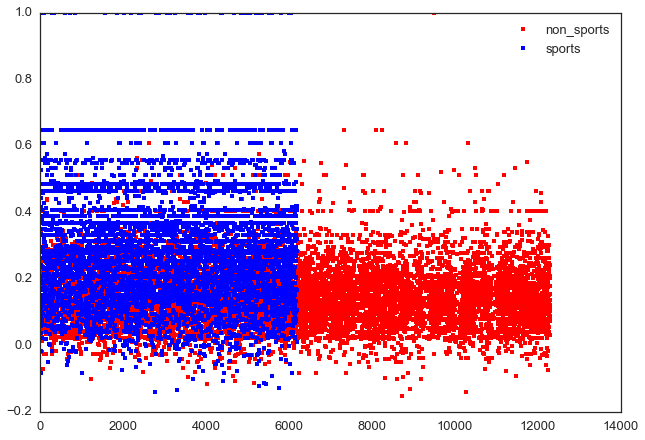

In [41]:
plt.plot(tweets_df[tweets_df['label']==0]['max_similarity'],'r.')
plt.hold('on')
plt.plot(tweets_df[tweets_df['label']==1]['max_similarity'],'b.')

plt.legend(['non_sports','sports'])

In [175]:
model.most_similar('a')

[(u'another', 0.4543946385383606),
 (u'the', 0.4073341488838196),
 (u'every', 0.3476393520832062),
 (u'this', 0.3425523042678833),
 (u'outhouse', 0.33183571696281433),
 (u'single', 0.31483733654022217),
 (u'foamy', 0.31360262632369995),
 (u'glitch', 0.3082168698310852),
 (u'an', 0.3048752546310425),
 (u'any', 0.3026069402694702)]

In [158]:
model.similarity('sport','nhl')

0.41554916821421883

In [166]:
np.argmax(map(find_similarity,tweets_df['content'][1]))

5

In [146]:
model.sim

[u'love',
 u'october',
 u'halloween',
 u'nfl',
 u'nba',
 u'nhl',
 u'playoff',
 u'baseball',
 u'life',
 u'good',
 u'anthonydimoro',
 u'sportsrants']

In [62]:
tweets_df[]

,text,lang,label,tokstop,hashtag,mention,content
0,rt @lfletcher59: great perspective on an idiot...,en,1,"[@lfletcher59, great, perspective, idiot, http...",[],[@lfletcher59],"[great, perspective, idiot, http://t.co/nyospc..."
1,"rt @anthonydimoro: i love october. halloween, ...",en,1,"[@anthonydimoro, love, october, halloween, nfl...",[#sportsrants],[@anthonydimoro],"[love, october, halloween, nfl, nba, nhl, play..."
2,rt @auburnswimming: swimming and diving opens ...,en,1,"[@auburnswimming, swimming, diving, opens, dua...",[],[@auburnswimming],"[swimming, diving, opens, dual, meet, season, ..."
3,my latest episode is now available! listen to ...,en,1,"[latest, episode, available, listen, new, epis...",[#blogtalkradio],[],"[latest, episode, available, listen, new, epis..."
4,#fifa football 2005 was first released on this...,en,1,"[#fifa, football, 2005, first, released, day, ...",[#fifa],[],"[football, 2005, first, released, day, 2004, h..."
5,rt @ghetto_cnn: women in fifa 16 is actually f...,en,1,"[@ghetto_cnn, women, fifa, 16, actually, fun, ...",[],[@ghetto_cnn],"[women, fifa, 16, actually, fun, https://t.co/..."
6,rt @woridstarcomedy: jordan retired and is sti...,en,1,"[@woridstarcomedy, jordan, retired, still, kno...",[],[@woridstarcomedy],"[jordan, retired, still, known, best, basketba..."
7,@388dalesfan @espn people make too much of it ...,en,1,"[@388dalesfan, @espn, people, make, much, days...",[],"[@388dalesfan, @espn]","[people, make, much, days, denying, people, co..."
8,former roadrunners now current nfl players ash...,en,1,"[former, roadrunners, current, nfl, players, a...","[#weareutsa, #utsasocial]",[],"[former, roadrunners, current, nfl, players, a..."
9,#fifa world cup 2018 qualifier: india suffer f...,en,1,"[#fifa, world, cup, 2018, qualifier, india, su...","[#fifa, #indvtkm, #isl]",[],"[world, cup, 2018, qualifier, india, suffer, f..."
